In [1]:
!pip install https://github.com/matplotlib/basemap/archive/master.zip

     / 133.1 MB 103.1 MB/s
     |████████████████████████████████| 6.3 MB 31.3 MB/s 
     |████████████████████████████████| 219 kB 43.1 MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759598 sha256=ff6410ed56f2971774214bbd4ae8675b905fab73dc3120fc149b66669614eb66
  Stored in directory: /tmp/pip-ephem-wheel-cache-ivu70li1/wheels/98/1a/9d/de6aa4dee52d726996be77bb4a65cf03865288bfc35e5b24d8
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37325 sha256=d1df85fbeae43a44a32ba78ce296969ae074f5bd13b197b1e92a0faef77e2ea3
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built basemap pyshp


In [2]:
from mpl_toolkits.basemap import Basemap

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno # Ploting missng values
import plotly.graph_objects as go

In [34]:

# warning
import warnings
warnings.filterwarnings('ignore')
# clustering
from sklearn import preprocessing 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
# standarization
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
#plotly 
import plotly.offline as py
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
import plotly.express as px
# Styling 
#plt.style.use('fivethirtyeight')

In [5]:
url='https://raw.githubusercontent.com/Jurk06/project-at-isi/main/Atal%20Jal%2031%20March%202021%20.xlsx%20-%20Sheet1.csv'
df=pd.read_csv(url)
df.head()

,Sl. No.,State,District,Block,Village,TYPE,SOURCE,Site_Name,Latitude,Longitude,Well Depth,Aquifier,Level Depth Ratio,Pre_2015,Pst_2015,Pre_2016,Pst_2016,Pre_2017,Pst_2017,Pre_2018,Pst_2018,Pre_2019,Pst_2019,Final Count,Pre Diff 19 15,Pst Diff 19 15,Diff 2015,Diff 2016,Diff 2017,Diff 2018,Diff 2019,Avg Diff,Avg Pre,Avg Post,Avg Level,Sign Diff 15,Sign Diff 16,Sign Diff 17,Sign Diff 18,Sign Diff 19,Sum Signed Diff
0,1,Gujarat,Mahesana,Jotana,Suraj,Piezometer,CGWB,Suraj,23.126944,72.193056,30.0,Unconfined,1.009838,NaN,35.343750,35.875000,30.015625,30.750000,28.375000,27.953125,27.000000,29.718750,27.625000,9,NaN,-7.718750,NaN,-5.859375,-2.375000,-0.953125,-2.093750,-2.82,31.07,29.67,30.30,0,-1,-1,-1,-1,-4
1,2,Gujarat,Mahesana,Jotana,Jotana,Piezometer,CGWB,Jotana Pziii,23.130556,72.376111,300.0,Confined,0.015980,4.960938,4.699219,5.261719,5.179688,5.761719,4.519531,4.621094,4.238281,4.808594,3.890625,10,-0.152344,-0.808594,-0.261719,-0.082031,-1.242188,-0.382812,-0.917969,-0.58,5.08,4.51,4.79,-1,-1,-1,-1,-1,-5
2,3,Gujarat,Kachchh,Bhuj,Kera,Piezometer,CGWB,Madhapar,23.142778,69.737500,130.0,Confined,0.378098,47.875000,50.781250,NaN,47.531250,47.875000,51.218750,47.968750,53.375000,51.312500,44.437500,9,3.437500,-6.343750,2.906250,NaN,3.343750,5.406250,-6.875000,1.20,48.76,49.47,49.15,1,0,1,1,-1,2
3,4,Gujarat,Gandhinagar,Dehgam,Dehgam (M),Piezometer,CGWB,Dahegam I,23.170833,72.841667,107.0,Confined,0.490077,62.437500,62.437500,63.343750,NaN,74.562500,3.029297,73.937500,NaN,65.437500,14.320312,8,3.000000,-48.117188,0.000000,NaN,-71.533203,NaN,-51.117188,-40.88,67.94,26.60,52.44,0,0,-1,0,-1,-2
4,5,Gujarat,Gandhinagar,Gandhinagar,Shertha,Piezometer,CGWB,Kasturinagar(IFFCO),23.190278,72.552778,47.0,Unconfined,0.269731,11.992188,11.726562,13.429688,13.476562,14.351562,9.851562,13.109375,13.703125,15.609375,9.523438,10,3.617188,-2.203125,-0.265625,0.046875,-4.500000,0.593750,-6.085938,-2.04,13.70,11.66,12.68,-1,1,-1,1,-1,-1


In [6]:
df['State']=df['State'].str.lower()

In [8]:
df['State'].value_counts()


maharashtra       699
haryana           614
rajasthan         387
karnataka         299
gujarat           272
uttar pradesh     198
madhya pradesh    187
Name: State, dtype: int64

In [9]:
df.fillna(method="ffill", inplace=True)

In [10]:
df.isnull().sum()


Sl. No.              0
State                0
District             0
Block                0
Village              0
TYPE                 0
SOURCE               0
Site_Name            0
Latitude             0
Longitude            0
Well Depth           0
Aquifier             0
Level Depth Ratio    0
Pre_2015             1
Pst_2015             0
Pre_2016             0
Pst_2016             0
Pre_2017             0
Pst_2017             0
Pre_2018             0
Pst_2018             0
Pre_2019             0
Pst_2019             0
Final Count          0
Pre Diff 19 15       1
Pst Diff 19 15       0
Diff 2015            1
Diff 2016            0
Diff 2017            0
Diff 2018            0
Diff 2019            0
Avg Diff             0
Avg Pre              0
Avg Post             0
Avg Level            0
Sign Diff 15         0
Sign Diff 16         0
Sign Diff 17         0
Sign Diff 18         0
Sign Diff 19         0
Sum Signed Diff      0
dtype: int64

In [11]:
df.columns.values

array(['Sl. No.', 'State', 'District', 'Block', 'Village', 'TYPE',
       'SOURCE', 'Site_Name', 'Latitude', 'Longitude', 'Well Depth',
       'Aquifier', 'Level Depth Ratio', 'Pre_2015', 'Pst_2015',
       'Pre_2016', 'Pst_2016', 'Pre_2017', 'Pst_2017', 'Pre_2018',
       'Pst_2018', 'Pre_2019', 'Pst_2019', 'Final Count',
       'Pre Diff 19 15', 'Pst Diff 19 15', 'Diff 2015', 'Diff 2016',
       'Diff 2017', 'Diff 2018', 'Diff 2019', 'Avg Diff', 'Avg Pre',
       'Avg Post ', 'Avg Level', 'Sign Diff 15', 'Sign Diff 16',
       'Sign Diff 17', 'Sign Diff 18', 'Sign Diff 19', 'Sum Signed Diff'],
      dtype=object)

In [12]:
label_encoder = preprocessing.LabelEncoder() 

df['State'] = label_encoder.fit_transform(df['State'])
df.head()

,Sl. No.,State,District,Block,Village,TYPE,SOURCE,Site_Name,Latitude,Longitude,Well Depth,Aquifier,Level Depth Ratio,Pre_2015,Pst_2015,Pre_2016,Pst_2016,Pre_2017,Pst_2017,Pre_2018,Pst_2018,Pre_2019,Pst_2019,Final Count,Pre Diff 19 15,Pst Diff 19 15,Diff 2015,Diff 2016,Diff 2017,Diff 2018,Diff 2019,Avg Diff,Avg Pre,Avg Post,Avg Level,Sign Diff 15,Sign Diff 16,Sign Diff 17,Sign Diff 18,Sign Diff 19,Sum Signed Diff
0,1,0,Mahesana,Jotana,Suraj,Piezometer,CGWB,Suraj,23.126944,72.193056,30.0,Unconfined,1.009838,NaN,35.343750,35.875000,30.015625,30.750000,28.375000,27.953125,27.000000,29.718750,27.625000,9,NaN,-7.718750,NaN,-5.859375,-2.375000,-0.953125,-2.093750,-2.82,31.07,29.67,30.30,0,-1,-1,-1,-1,-4
1,2,0,Mahesana,Jotana,Jotana,Piezometer,CGWB,Jotana Pziii,23.130556,72.376111,300.0,Confined,0.015980,4.960938,4.699219,5.261719,5.179688,5.761719,4.519531,4.621094,4.238281,4.808594,3.890625,10,-0.152344,-0.808594,-0.261719,-0.082031,-1.242188,-0.382812,-0.917969,-0.58,5.08,4.51,4.79,-1,-1,-1,-1,-1,-5
2,3,0,Kachchh,Bhuj,Kera,Piezometer,CGWB,Madhapar,23.142778,69.737500,130.0,Confined,0.378098,47.875000,50.781250,5.261719,47.531250,47.875000,51.218750,47.968750,53.375000,51.312500,44.437500,9,3.437500,-6.343750,2.906250,-0.082031,3.343750,5.406250,-6.875000,1.20,48.76,49.47,49.15,1,0,1,1,-1,2
3,4,0,Gandhinagar,Dehgam,Dehgam (M),Piezometer,CGWB,Dahegam I,23.170833,72.841667,107.0,Confined,0.490077,62.437500,62.437500,63.343750,47.531250,74.562500,3.029297,73.937500,53.375000,65.437500,14.320312,8,3.000000,-48.117188,0.000000,-0.082031,-71.533203,5.406250,-51.117188,-40.88,67.94,26.60,52.44,0,0,-1,0,-1,-2
4,5,0,Gandhinagar,Gandhinagar,Shertha,Piezometer,CGWB,Kasturinagar(IFFCO),23.190278,72.552778,47.0,Unconfined,0.269731,11.992188,11.726562,13.429688,13.476562,14.351562,9.851562,13.109375,13.703125,15.609375,9.523438,10,3.617188,-2.203125,-0.265625,0.046875,-4.500000,0.593750,-6.085938,-2.04,13.70,11.66,12.68,-1,1,-1,1,-1,-1


In [13]:
df['State'].value_counts()


4    699
1    614
5    387
2    299
0    272
6    198
3    187
Name: State, dtype: int64

In [14]:
df['SOURCE'] = label_encoder.fit_transform(df['SOURCE'])
df.head()

,Sl. No.,State,District,Block,Village,TYPE,SOURCE,Site_Name,Latitude,Longitude,Well Depth,Aquifier,Level Depth Ratio,Pre_2015,Pst_2015,Pre_2016,Pst_2016,Pre_2017,Pst_2017,Pre_2018,Pst_2018,Pre_2019,Pst_2019,Final Count,Pre Diff 19 15,Pst Diff 19 15,Diff 2015,Diff 2016,Diff 2017,Diff 2018,Diff 2019,Avg Diff,Avg Pre,Avg Post,Avg Level,Sign Diff 15,Sign Diff 16,Sign Diff 17,Sign Diff 18,Sign Diff 19,Sum Signed Diff
0,1,0,Mahesana,Jotana,Suraj,Piezometer,0,Suraj,23.126944,72.193056,30.0,Unconfined,1.009838,NaN,35.343750,35.875000,30.015625,30.750000,28.375000,27.953125,27.000000,29.718750,27.625000,9,NaN,-7.718750,NaN,-5.859375,-2.375000,-0.953125,-2.093750,-2.82,31.07,29.67,30.30,0,-1,-1,-1,-1,-4
1,2,0,Mahesana,Jotana,Jotana,Piezometer,0,Jotana Pziii,23.130556,72.376111,300.0,Confined,0.015980,4.960938,4.699219,5.261719,5.179688,5.761719,4.519531,4.621094,4.238281,4.808594,3.890625,10,-0.152344,-0.808594,-0.261719,-0.082031,-1.242188,-0.382812,-0.917969,-0.58,5.08,4.51,4.79,-1,-1,-1,-1,-1,-5
2,3,0,Kachchh,Bhuj,Kera,Piezometer,0,Madhapar,23.142778,69.737500,130.0,Confined,0.378098,47.875000,50.781250,5.261719,47.531250,47.875000,51.218750,47.968750,53.375000,51.312500,44.437500,9,3.437500,-6.343750,2.906250,-0.082031,3.343750,5.406250,-6.875000,1.20,48.76,49.47,49.15,1,0,1,1,-1,2
3,4,0,Gandhinagar,Dehgam,Dehgam (M),Piezometer,0,Dahegam I,23.170833,72.841667,107.0,Confined,0.490077,62.437500,62.437500,63.343750,47.531250,74.562500,3.029297,73.937500,53.375000,65.437500,14.320312,8,3.000000,-48.117188,0.000000,-0.082031,-71.533203,5.406250,-51.117188,-40.88,67.94,26.60,52.44,0,0,-1,0,-1,-2
4,5,0,Gandhinagar,Gandhinagar,Shertha,Piezometer,0,Kasturinagar(IFFCO),23.190278,72.552778,47.0,Unconfined,0.269731,11.992188,11.726562,13.429688,13.476562,14.351562,9.851562,13.109375,13.703125,15.609375,9.523438,10,3.617188,-2.203125,-0.265625,0.046875,-4.500000,0.593750,-6.085938,-2.04,13.70,11.66,12.68,-1,1,-1,1,-1,-1





1.   Maharashtra 699
2.   Haryana 614
3.   Rajasthan 387
4.   Karnataka 299
4.    Gujarat 272
5.    Madhya Pradesh 187
6.    Uttar pradesh 170
7.    Uttar Pradesh 28



In [15]:
col=[ 'State',  'Well Depth', 'SOURCE',
       'Level Depth Ratio', 'Pre_2015', 'Pst_2015', 'Pre_2016', 'Pst_2016',
       'Pre_2017', 'Pst_2017', 'Pre_2018', 'Pst_2018', 'Pre_2019', 'Pst_2019']

In [16]:
xx=df[col]

In [17]:
xx.replace('NAN', 0)

,State,Well Depth,SOURCE,Level Depth Ratio,Pre_2015,Pst_2015,Pre_2016,Pst_2016,Pre_2017,Pst_2017,Pre_2018,Pst_2018,Pre_2019,Pst_2019
0,0,30.00,0,1.009838,NaN,35.343750,35.875000,30.015625,30.750000,28.375000,27.953125,27.000000,29.718750,27.625000
1,0,300.00,0,0.015980,4.960938,4.699219,5.261719,5.179688,5.761719,4.519531,4.621094,4.238281,4.808594,3.890625
2,0,130.00,0,0.378098,47.875000,50.781250,5.261719,47.531250,47.875000,51.218750,47.968750,53.375000,51.312500,44.437500
3,0,107.00,0,0.490077,62.437500,62.437500,63.343750,47.531250,74.562500,3.029297,73.937500,53.375000,65.437500,14.320312
4,0,47.00,0,0.269731,11.992188,11.726562,13.429688,13.476562,14.351562,9.851562,13.109375,13.703125,15.609375,9.523438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2651,6,15.90,0,0.614591,9.500000,7.430000,9.400000,6.600000,7.410000,7.950000,10.080000,13.800000,9.720000,15.830000
2652,6,33.08,0,0.192684,4.300000,3.700000,9.150000,5.600000,6.460000,5.940000,11.190000,4.000000,5.660000,7.740000
2653,6,28.70,0,0.281446,8.980000,8.480000,9.150000,5.600000,8.020000,6.590000,8.360000,8.530000,9.000000,6.660000
2654,6,20.75,0,0.726801,11.460000,10.230000,15.760000,13.160000,14.550000,17.020000,17.190000,17.640000,18.720000,6.660000


In [18]:
xx.fillna(xx['Pre_2015'].mean(), inplace=True)

In [19]:
xx.isna().sum()

State                0
Well Depth           0
SOURCE               0
Level Depth Ratio    0
Pre_2015             0
Pst_2015             0
Pre_2016             0
Pst_2016             0
Pre_2017             0
Pst_2017             0
Pre_2018             0
Pst_2018             0
Pre_2019             0
Pst_2019             0
dtype: int64

In [20]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(xx) 

In [21]:
# Normalizing the Data 
normalized_df = normalize(scaled_df)

In [22]:
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df)

In [23]:
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

,P1,P2
0,0.531700,0.230531
1,0.172466,-0.297292


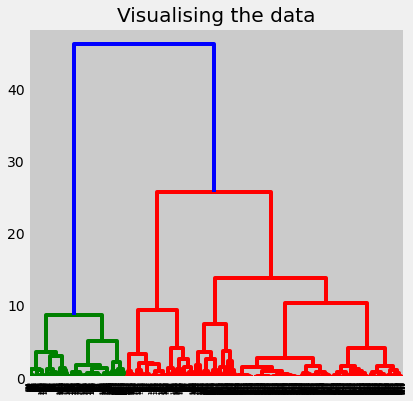

In [24]:
plt.figure(figsize =(6, 6)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward'))) 

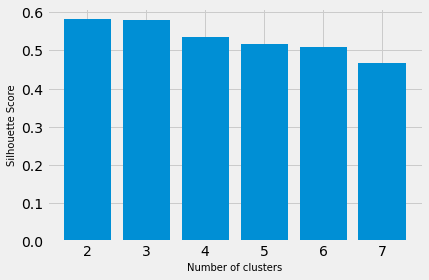

In [25]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_principal, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

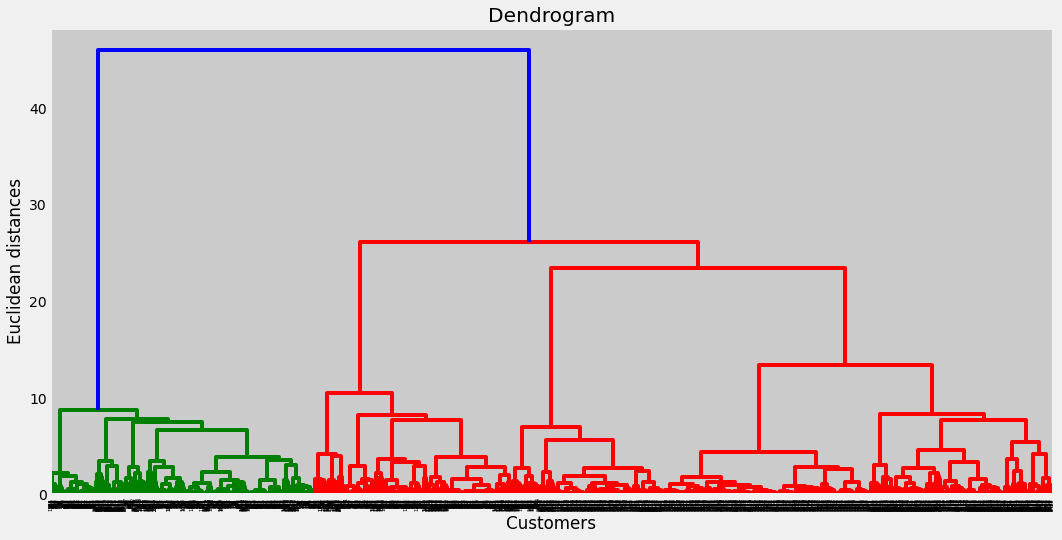

In [26]:
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(normalized_df, method  = "ward"))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [27]:
hc = AgglomerativeClustering(n_clusters = 9, affinity = 'euclidean', linkage ='average')

y_hc = hc.fit_predict(normalized_df)
y_hc

array([1, 1, 1, ..., 7, 7, 7])

In [28]:
df['cluster'] = pd.DataFrame(y_hc)

In [32]:
df['cluster'].value_counts()

4    989
0    618
2    444
7    364
1    110
3     77
6     30
5     20
8      4
Name: cluster, dtype: int64

In [29]:
df.head()

,Sl. No.,State,District,Block,Village,TYPE,SOURCE,Site_Name,Latitude,Longitude,Well Depth,Aquifier,Level Depth Ratio,Pre_2015,Pst_2015,Pre_2016,Pst_2016,Pre_2017,Pst_2017,Pre_2018,Pst_2018,Pre_2019,Pst_2019,Final Count,Pre Diff 19 15,Pst Diff 19 15,Diff 2015,Diff 2016,Diff 2017,Diff 2018,Diff 2019,Avg Diff,Avg Pre,Avg Post,Avg Level,Sign Diff 15,Sign Diff 16,Sign Diff 17,Sign Diff 18,Sign Diff 19,Sum Signed Diff,cluster
0,1,0,Mahesana,Jotana,Suraj,Piezometer,0,Suraj,23.126944,72.193056,30.0,Unconfined,1.009838,NaN,35.343750,35.875000,30.015625,30.750000,28.375000,27.953125,27.000000,29.718750,27.625000,9,NaN,-7.718750,NaN,-5.859375,-2.375000,-0.953125,-2.093750,-2.82,31.07,29.67,30.30,0,-1,-1,-1,-1,-4,1
1,2,0,Mahesana,Jotana,Jotana,Piezometer,0,Jotana Pziii,23.130556,72.376111,300.0,Confined,0.015980,4.960938,4.699219,5.261719,5.179688,5.761719,4.519531,4.621094,4.238281,4.808594,3.890625,10,-0.152344,-0.808594,-0.261719,-0.082031,-1.242188,-0.382812,-0.917969,-0.58,5.08,4.51,4.79,-1,-1,-1,-1,-1,-5,1
2,3,0,Kachchh,Bhuj,Kera,Piezometer,0,Madhapar,23.142778,69.737500,130.0,Confined,0.378098,47.875000,50.781250,5.261719,47.531250,47.875000,51.218750,47.968750,53.375000,51.312500,44.437500,9,3.437500,-6.343750,2.906250,-0.082031,3.343750,5.406250,-6.875000,1.20,48.76,49.47,49.15,1,0,1,1,-1,2,1
3,4,0,Gandhinagar,Dehgam,Dehgam (M),Piezometer,0,Dahegam I,23.170833,72.841667,107.0,Confined,0.490077,62.437500,62.437500,63.343750,47.531250,74.562500,3.029297,73.937500,53.375000,65.437500,14.320312,8,3.000000,-48.117188,0.000000,-0.082031,-71.533203,5.406250,-51.117188,-40.88,67.94,26.60,52.44,0,0,-1,0,-1,-2,1
4,5,0,Gandhinagar,Gandhinagar,Shertha,Piezometer,0,Kasturinagar(IFFCO),23.190278,72.552778,47.0,Unconfined,0.269731,11.992188,11.726562,13.429688,13.476562,14.351562,9.851562,13.109375,13.703125,15.609375,9.523438,10,3.617188,-2.203125,-0.265625,0.046875,-4.500000,0.593750,-6.085938,-2.04,13.70,11.66,12.68,-1,1,-1,1,-1,-1,7


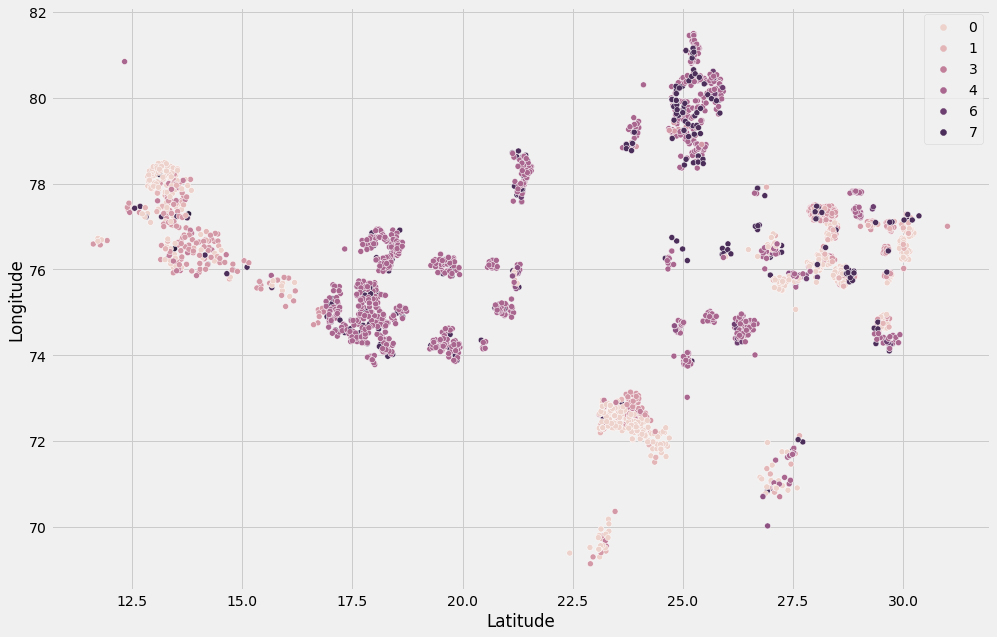

In [35]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x=df['Latitude'], y=df['Longitude'], hue=df['cluster'])
plt.legend(loc="best")
plt.show()

In [38]:
df['State']=df['State'].replace(0, 'Gujarat')
df['State']=df['State'].replace(1, 'Haryana')
df['State']=df['State'].replace(2, 'Karnataka')
df['State']=df['State'].replace(3, 'Madhya Pradesh')
df['State']=df['State'].replace(4, 'Maharashtra')
df['State']=df['State'].replace(5, 'Rajasthan')
df['State']=df['State'].replace(6, 'Uttar Pradesh')

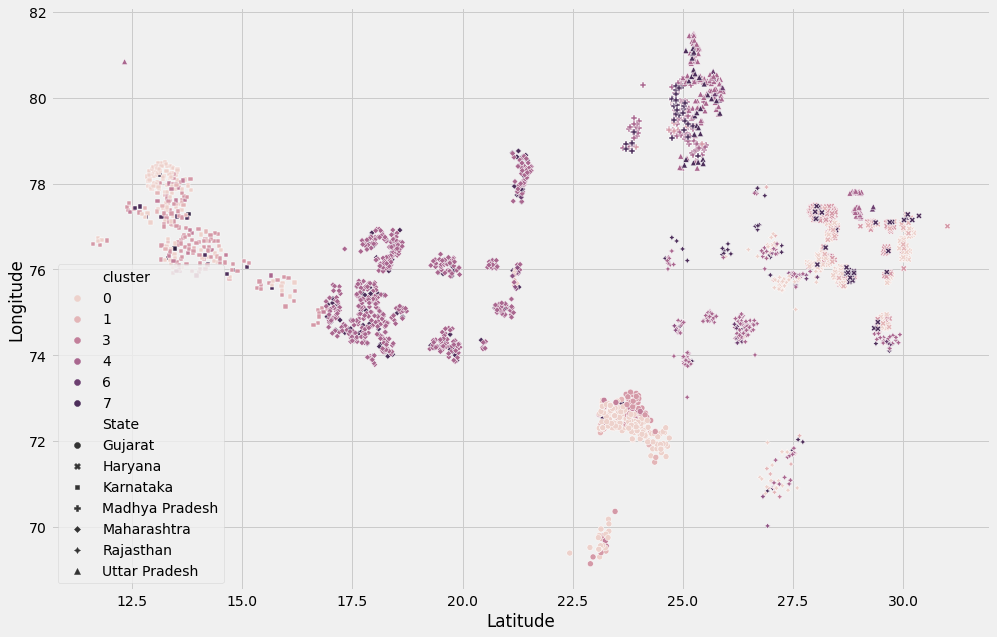

In [39]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x=df['Latitude'], y=df['Longitude'], hue=df['cluster'], style=df['State'])
plt.legend(loc="best")
plt.show()

In [36]:
df.head().T

,0,1,2,3,4
Sl. No.,1,2,3,4,5
State,0,0,0,0,0
District,Mahesana,Mahesana,Kachchh,Gandhinagar,Gandhinagar
Block,Jotana,Jotana,Bhuj,Dehgam,Gandhinagar
Village,Suraj,Jotana,Kera,Dehgam (M),Shertha
TYPE,Piezometer,Piezometer,Piezometer,Piezometer,Piezometer
SOURCE,0,0,0,0,0
Site_Name,Suraj,Jotana Pziii,Madhapar,Dahegam I,Kasturinagar(IFFCO)
Latitude,23.1269,23.1306,23.1428,23.1708,23.1903
Longitude,72.1931,72.3761,69.7375,72.8417,72.5528


In [37]:
df.columns.values

array(['Sl. No.', 'State', 'District', 'Block', 'Village', 'TYPE',
       'SOURCE', 'Site_Name', 'Latitude', 'Longitude', 'Well Depth',
       'Aquifier', 'Level Depth Ratio', 'Pre_2015', 'Pst_2015',
       'Pre_2016', 'Pst_2016', 'Pre_2017', 'Pst_2017', 'Pre_2018',
       'Pst_2018', 'Pre_2019', 'Pst_2019', 'Final Count',
       'Pre Diff 19 15', 'Pst Diff 19 15', 'Diff 2015', 'Diff 2016',
       'Diff 2017', 'Diff 2018', 'Diff 2019', 'Avg Diff', 'Avg Pre',
       'Avg Post ', 'Avg Level', 'Sign Diff 15', 'Sign Diff 16',
       'Sign Diff 17', 'Sign Diff 18', 'Sign Diff 19', 'Sum Signed Diff',
       'cluster'], dtype=object)

In [40]:
col=['Latitude', 'Longitude' ]

In [41]:
xx=df[col]

In [42]:
xx.replace('NAN', 0)

,Latitude,Longitude
0,23.126944,72.193056
1,23.130556,72.376111
2,23.142778,69.737500
3,23.170833,72.841667
4,23.190278,72.552778
...,...,...
2651,25.483333,80.320833
2652,25.563889,80.067778
2653,25.648333,79.976667
2654,25.761111,79.930000


In [43]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(xx) 

In [44]:
# Normalizing the Data 
normalized_df = normalize(scaled_df) 

In [45]:
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df)

In [46]:
hc = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage ='average')

y_hc = hc.fit_predict(normalized_df)
y_hc

array([4, 4, 4, ..., 6, 6, 6])

In [47]:
df['cluster'] = pd.DataFrame(y_hc)

In [48]:
df.head()

,Sl. No.,State,District,Block,Village,TYPE,SOURCE,Site_Name,Latitude,Longitude,Well Depth,Aquifier,Level Depth Ratio,Pre_2015,Pst_2015,Pre_2016,Pst_2016,Pre_2017,Pst_2017,Pre_2018,Pst_2018,Pre_2019,Pst_2019,Final Count,Pre Diff 19 15,Pst Diff 19 15,Diff 2015,Diff 2016,Diff 2017,Diff 2018,Diff 2019,Avg Diff,Avg Pre,Avg Post,Avg Level,Sign Diff 15,Sign Diff 16,Sign Diff 17,Sign Diff 18,Sign Diff 19,Sum Signed Diff,cluster
0,1,Gujarat,Mahesana,Jotana,Suraj,Piezometer,0,Suraj,23.126944,72.193056,30.0,Unconfined,1.009838,NaN,35.343750,35.875000,30.015625,30.750000,28.375000,27.953125,27.000000,29.718750,27.625000,9,NaN,-7.718750,NaN,-5.859375,-2.375000,-0.953125,-2.093750,-2.82,31.07,29.67,30.30,0,-1,-1,-1,-1,-4,4
1,2,Gujarat,Mahesana,Jotana,Jotana,Piezometer,0,Jotana Pziii,23.130556,72.376111,300.0,Confined,0.015980,4.960938,4.699219,5.261719,5.179688,5.761719,4.519531,4.621094,4.238281,4.808594,3.890625,10,-0.152344,-0.808594,-0.261719,-0.082031,-1.242188,-0.382812,-0.917969,-0.58,5.08,4.51,4.79,-1,-1,-1,-1,-1,-5,4
2,3,Gujarat,Kachchh,Bhuj,Kera,Piezometer,0,Madhapar,23.142778,69.737500,130.0,Confined,0.378098,47.875000,50.781250,5.261719,47.531250,47.875000,51.218750,47.968750,53.375000,51.312500,44.437500,9,3.437500,-6.343750,2.906250,-0.082031,3.343750,5.406250,-6.875000,1.20,48.76,49.47,49.15,1,0,1,1,-1,2,4
3,4,Gujarat,Gandhinagar,Dehgam,Dehgam (M),Piezometer,0,Dahegam I,23.170833,72.841667,107.0,Confined,0.490077,62.437500,62.437500,63.343750,47.531250,74.562500,3.029297,73.937500,53.375000,65.437500,14.320312,8,3.000000,-48.117188,0.000000,-0.082031,-71.533203,5.406250,-51.117188,-40.88,67.94,26.60,52.44,0,0,-1,0,-1,-2,4
4,5,Gujarat,Gandhinagar,Gandhinagar,Shertha,Piezometer,0,Kasturinagar(IFFCO),23.190278,72.552778,47.0,Unconfined,0.269731,11.992188,11.726562,13.429688,13.476562,14.351562,9.851562,13.109375,13.703125,15.609375,9.523438,10,3.617188,-2.203125,-0.265625,0.046875,-4.500000,0.593750,-6.085938,-2.04,13.70,11.66,12.68,-1,1,-1,1,-1,-1,4


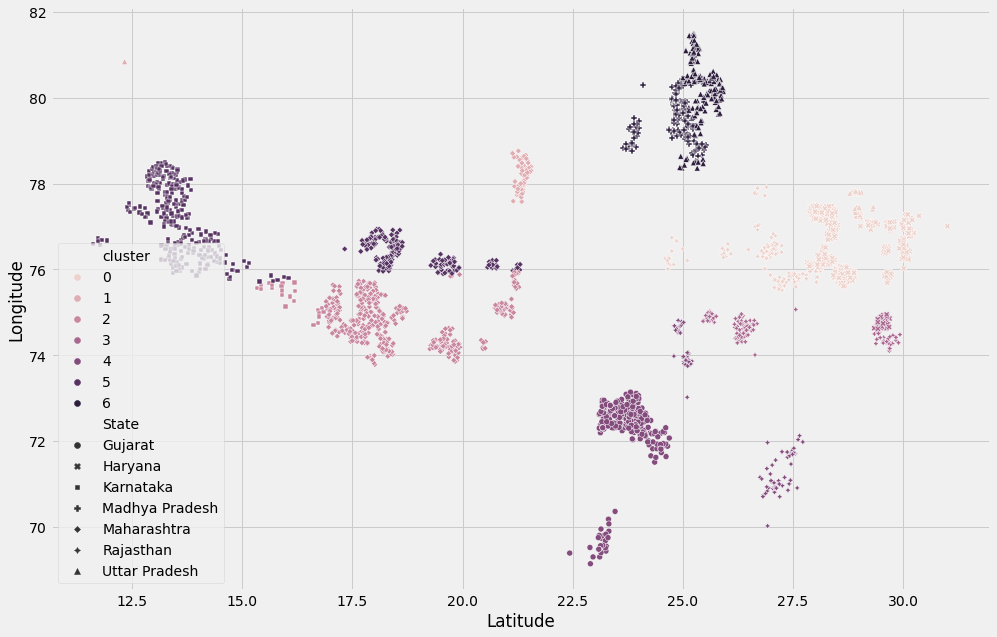

In [49]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x=df['Latitude'], y=df['Longitude'], hue=df['cluster'], style=df['State'])
plt.legend(loc="best")
plt.show()

In [50]:
df['cluster'].value_counts()

0    721
5    471
2    427
4    399
6    351
3    186
1    101
Name: cluster, dtype: int64

In [53]:
df.columns

Index(['Sl. No.', 'State', 'District', 'Block', 'Village', 'TYPE', 'SOURCE',
       'Site_Name', 'Latitude', 'Longitude', 'Well Depth', 'Aquifier',
       'Level Depth Ratio', 'Pre_2015', 'Pst_2015', 'Pre_2016', 'Pst_2016',
       'Pre_2017', 'Pst_2017', 'Pre_2018', 'Pst_2018', 'Pre_2019', 'Pst_2019',
       'Final Count', 'Pre Diff 19 15', 'Pst Diff 19 15', 'Diff 2015',
       'Diff 2016', 'Diff 2017', 'Diff 2018', 'Diff 2019', 'Avg Diff',
       'Avg Pre', 'Avg Post ', 'Avg Level', 'Sign Diff 15', 'Sign Diff 16',
       'Sign Diff 17', 'Sign Diff 18', 'Sign Diff 19', 'Sum Signed Diff',
       'cluster'],
      dtype='object')

In [59]:
from numpy import array
from matplotlib import cm
from matplotlib.dates import date2num
from mpl_toolkits.basemap import Basemap

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

In [60]:
def plot_map(sizes, colorbarValue):

    plt.figure(figsize=(19,20))
    f, ax = plt.subplots(figsize=(19, 20))

    # Setting up Basemap
    map = Basemap(width=5000000, height=3500000, resolution='l', projection='aea', llcrnrlon=69,
                  llcrnrlat=6, urcrnrlon=99, urcrnrlat=36, lon_0=78, lat_0=20, ax=ax)
                  
    # draw map boundaries
    map.drawmapboundary()
    map.drawcountries()
    map.drawcoastlines()
    #map.readshapefile('../input/indian-states/india_administrative_state_boundary', 'indian-states')


    # plotting cities on map using previously derived coordinates
    x, y = map(array(df["Longitude"]), array(df["Latitude"]))
    cs = map.scatter(x, y, s=sizes, marker="o" ,c=sizes, cmap=cm.Dark2, alpha=0.5)

    # adding colorbar
    cbar = map.colorbar(cs, location='right',pad="5%")
    cbar.ax.set_yticklabels(colorbarValue)

    plt.show()

<Figure size 1368x1440 with 0 Axes>

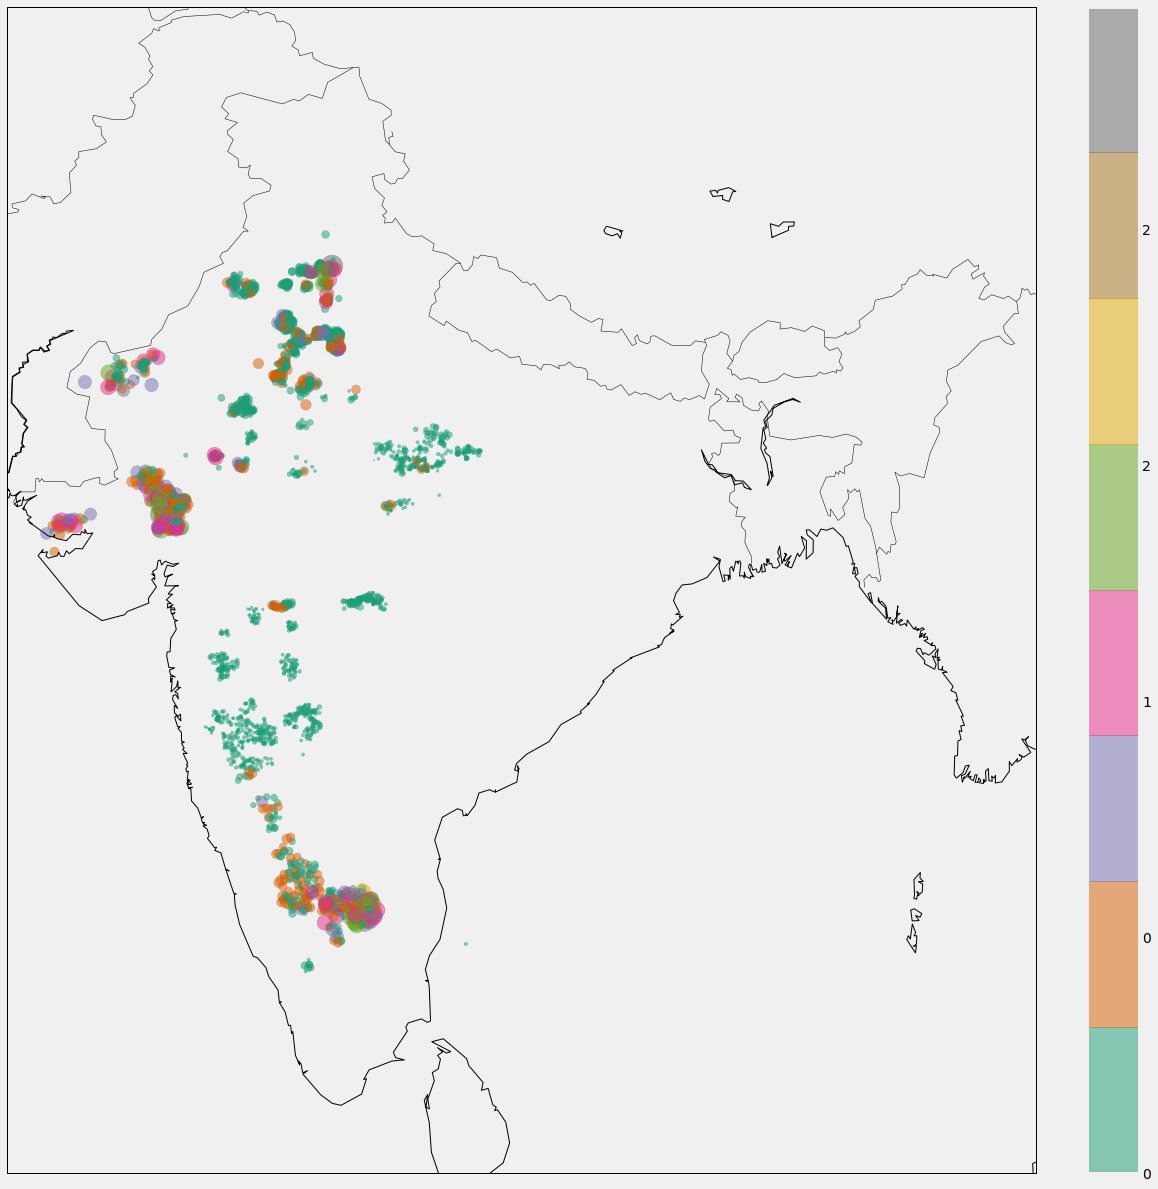

In [61]:
well_sizes = df["Well Depth"].apply(lambda x: int(x))
colorbarValue = np.linspace(df["cluster"].min(), df["cluster"].max(), 
                            num=10)
colorbarValue = colorbarValue.astype(int)

plot_map(well_sizes, colorbarValue)

<Figure size 1368x1440 with 0 Axes>

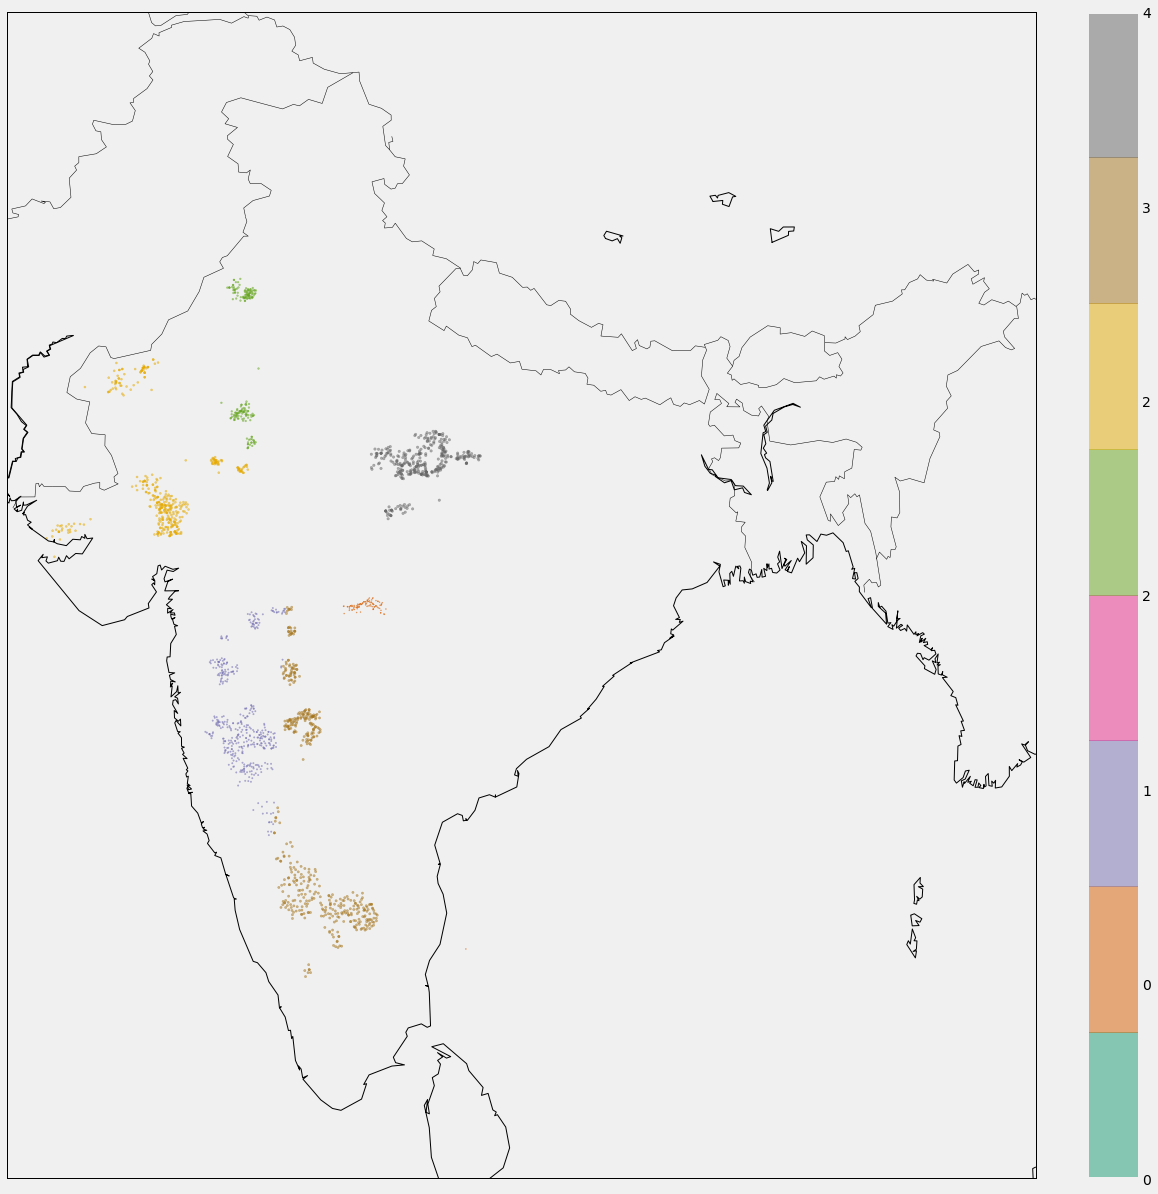

In [62]:
well_sizes = df["cluster"].apply(lambda x: int(x))
colorbarValue = np.linspace(df["cluster"].min(), df["cluster"].max(), 
                            num=10)
colorbarValue = colorbarValue.astype(int)

plot_map(well_sizes, colorbarValue)

<Figure size 1368x1440 with 0 Axes>

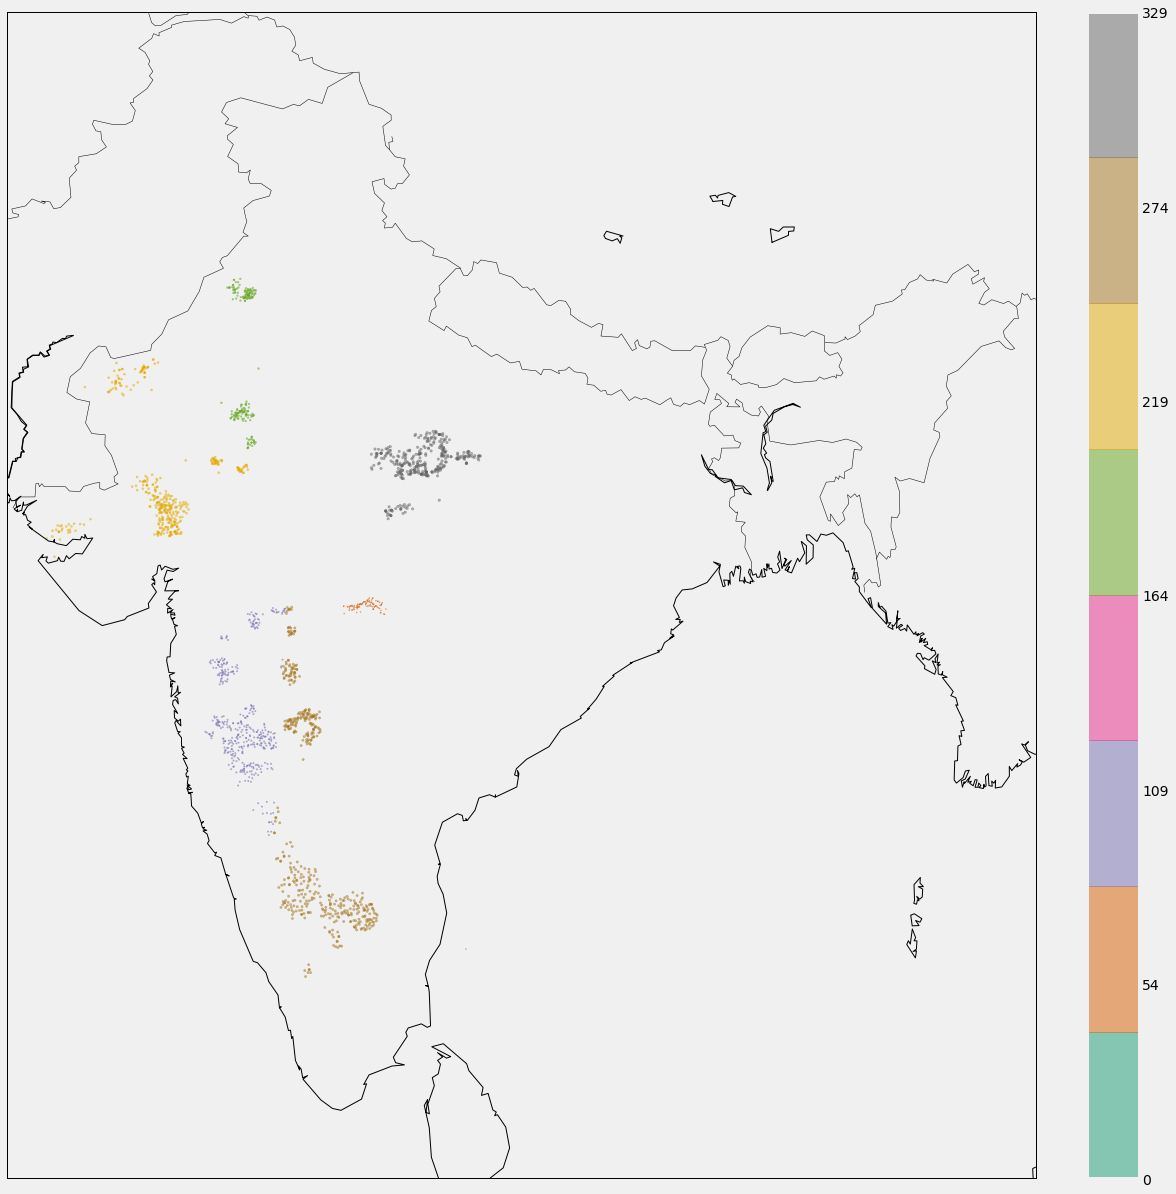

In [63]:
well_sizes = df["cluster"].apply(lambda x: int(x))
colorbarValue = np.linspace(df["Well Depth"].min(), df["Well Depth"].max(), 
                            num=10)
colorbarValue = colorbarValue.astype(int)

plot_map(well_sizes, colorbarValue)